### Описание
Практика разведочного анализа (EDA) датасета аптечной сети (датасет сгенерированный)

### Загружаем и обрабатываем датафрейм

In [2]:
# Загрузка библиотеки pandas
import pandas as pd

# Загрузка датасета в датафрейм c кодировкой, принимающей кириллицу
df = pd.read_csv('dataset/data.csv', encoding='1251')

df.head()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,...,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,...,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.0,41.08,51.0,12.0,925.0,2.000000e+11,205,1,1.0
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,...,ФЛОРА КАВКАЗА ОАО,1.0,18.61,31.0,3.0,9.0,2.000100e+11,205,1,1.0
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,...,КОРОЛЕВФАРМ ООО,1.0,132.69,209.0,20.0,9.0,2.000100e+11,205,1,2.0
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,...,КОРОЛЕВФАРМ ООО,1.0,133.65,210.0,21.0,9.0,2.000100e+11,205,1,3.0
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,...,Новартис Фарма АГ,1.0,709.95,787.0,49.0,925.0,2.000000e+11,205,1,1.0


In [3]:
# Проверяем размер датасета
df.shape

# В датасете 4462 строки и 21 столбец

(4462, 21)

In [4]:
# Проверяем наличие пустых значений в столбцах
df.isna().any()

# В некоторых столбцах есть пропуски, их можно заменить

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc       True
DR_BCDisc      True
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [5]:
# Заменяем пустные значения на 0
df.fillna(0, inplace=True)
df.isna().any()

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc      False
DR_BCDisc     False
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [6]:
# Устанавливаем формат дробных чисел
pd.set_option('display.float_format', '{:.2f}'.format)

# Устанавливаем отображение столбцов датафрейма
pd.set_option('display.max_columns', 40)

# Проверяем названия столбцов
df.columns

Index(['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_Kkm', 'DR_TDoc',
       'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Prod', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'],
      dtype='object')

In [7]:
# Опускаем лишние столбцы
our_cols = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_NDrugs', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_TPay', 'DR_CDrugs', 'DR_Suppl', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl', 'DR_VZak', 'DR_Pos']

df = df[our_cols]

In [8]:
# Переименовываем столбцы на более понятные
df.columns = ['dt', 'c_time', 'nchk', 'ndoc', 'apt', 'drug', 'kol',
       'zak', 'roz', 'disc', 'pay_type', 'drug_id', 'suppl', 'disc_id', 'disc_barcode', 'empl', 'vzak', 'pos']
df.head(1)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00


In [9]:
# Проверяем кол-во уникальных значений в столбцах
df.nunique()

dt                 2
c_time          1983
nchk            1941
ndoc              16
apt                8
drug            1876
kol               51
zak             2704
roz              999
disc             384
pay_type           2
drug_id         1876
suppl             22
disc_id            9
disc_barcode     334
empl              13
vzak               2
pos               24
dtype: int64

In [10]:
# Меняем тип столбцов disc_barcode и disc_id на строковый, с части после запятой (т. к. это не числа)
df['disc_barcode'] = df['disc_barcode'].astype('str')
df['disc_barcode'] = df['disc_barcode'].astype('str').replace(r'\.0', '', regex=True)
df['disc_id'] = df['disc_id'].astype('str').replace(r'\.0', '', regex=True)
df.head(1)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00


In [11]:
# Приводим столбец с датой на более привычный у нас в стране формат
df2 = pd.read_csv('dataset/data.csv', encoding='1251')
df['dt'] = pd.to_datetime(df2['DR_Dat']).dt.strftime('%d.%m.%Y')
df.head(1)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00


In [12]:
# Столбец vzak означает "вид закупки"
df['vzak'].unique()

# Значения в нём можно заменить на что-то более осмысленное

array([1, 2])

In [13]:
# 1 будет означать обычную закупку, а 2 - через Интернет
df['vzak'] = df['vzak'].astype('str').replace('1', 'Обычный').replace('2', 'Интернет')
df['vzak'].unique()

array(['Обычный', 'Интернет'], dtype=object)

In [14]:
# Столбец pay_type обозначает оплату наличными или по карте
df['pay_type'].unique()

array([18, 15])

In [15]:
# Также меняем значения. 15 - оплата наличными, 18 - по карте
df['pay_type'] = df['pay_type'].astype('str').replace('15', 'Наличные').replace('18', 'Банковская карта')
df['pay_type'].unique()

array(['Банковская карта', 'Наличные'], dtype=object)

In [16]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,Банковская карта,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,Наличные,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,Наличные,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,Наличные,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,Банковская карта,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00


### Exploratory data analysis - разведочный анализ данных

In [ ]:
# Информация по типам данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            4462 non-null   object 
 1   c_time        4462 non-null   object 
 2   nchk          4462 non-null   int64  
 3   ndoc          4462 non-null   int64  
 4   apt           4462 non-null   int64  
 5   drug          4462 non-null   object 
 6   kol           4462 non-null   float64
 7   zak           4462 non-null   float64
 8   roz           4462 non-null   float64
 9   disc          4462 non-null   float64
 10  pay_type      4462 non-null   object 
 11  drug_id       4462 non-null   int64  
 12  suppl         4462 non-null   object 
 13  disc_id       4462 non-null   object 
 14  disc_barcode  4462 non-null   object 
 15  empl          4462 non-null   int64  
 16  vzak          4462 non-null   object 
 17  pos           4462 non-null   float64
dtypes: float64(5), int64(5), obj

In [18]:
# Краткая сводка по статистическим данным в столбцах
df.describe()

,nchk,ndoc,apt,kol,zak,roz,disc,drug_id,empl,pos
count,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00
mean,4903.14,10842995.33,10.84,1.03,241.64,306.05,10.56,259227.09,91.74,2.68
std,1839.70,6107181.40,6.11,0.54,454.56,532.17,31.37,299073.90,108.08,2.75
min,1698.00,2004595.00,2.00,0.01,0.01,0.01,0.00,3.00,25.00,1.00
25%,4187.00,6003620.00,6.00,1.00,36.64,52.00,0.00,29060.00,37.00,1.00
50%,4877.50,11007039.00,11.00,1.00,103.78,137.00,0.00,187304.00,53.00,2.00
75%,5472.75,18002536.00,18.00,1.00,299.06,391.75,7.00,377589.00,123.00,3.00
max,8490.00,18002543.00,18.00,20.00,11851.13,12345.00,650.00,1504498.00,605.00,24.00


In [19]:
# Проверяем, сколько всего покупок совершали наличными или по карте
df['pay_type'].value_counts()

pay_type
Банковская карта    2820
Наличные            1642
Name: count, dtype: int64

In [20]:
# Проверяем количество продаж по каждой аптеке
df.apt.value_counts()

apt
18    1207
2      979
11     870
6      511
13     322
17     243
15     177
7      153
Name: count, dtype: int64

In [21]:
# Также проверяем доли от кол-ва продаж по аптекам
df.apt.value_counts(normalize=True)

apt
18   0.27
2    0.22
11   0.19
6    0.11
13   0.07
17   0.05
15   0.04
7    0.03
Name: proportion, dtype: float64

In [25]:
# Группируем датафрейм по датам и проверяем, какую прибыль принёс каждый сотрудник (независимо от аптеки)
df.groupby(['dt', 'empl'])[['zak', 'roz', 'kol']].apply(lambda x: sum(x['kol']*(x['roz'] - x['zak'])))

dt          empl
11.08.2022  25     20642.29
            30     20328.67
            36     14090.04
            47     16983.79
            50     17384.41
            53     10056.40
            54     13981.47
            123    23756.34
            205     9724.19
            605     8341.71
12.08.2022  37     22613.80
            48     19244.82
            54     16801.83
            110    22711.32
            123    23167.41
            205     8873.30
dtype: float64

### Визуализации

<Axes: >

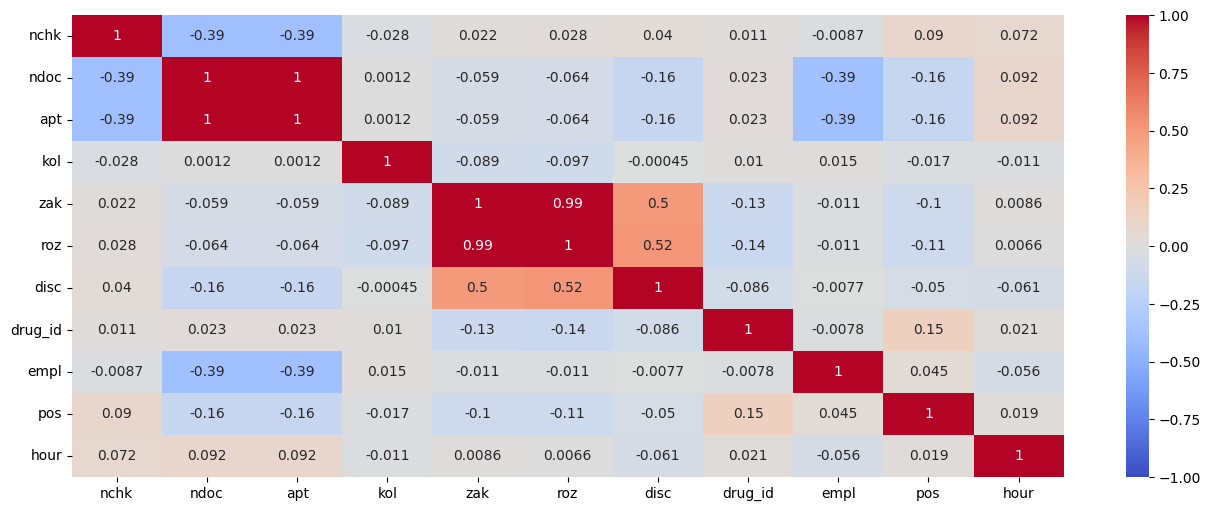

In [ ]:
# Загружаем библиотеки для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt

# Строим хитмап (тепловую карту) по столбцам для проверки корреляции
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True, cmap="coolwarm")

In [23]:
# Cгруппируем часы посещения аптек с кол-вом продаж
df['hour'] = pd.to_datetime(df['c_time']).dt.hour
gr = df.groupby(['hour'])['kol'].sum()
gr

C:\Users\Sersh\AppData\Local\Temp\ipykernel_17108\857031897.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['c_time']).dt.hour


hour
8     20.10
9    236.50
10   361.65
11   326.55
12   311.59
13   422.80
14   358.30
15   432.97
16   375.88
17   375.45
18   457.50
19   419.29
20   388.57
21    97.71
22     1.00
Name: kol, dtype: float64

<Axes: ylabel='kol'>

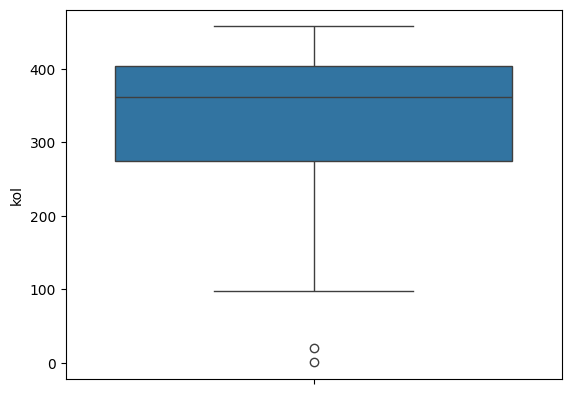

In [24]:
# Строим боксплот ("ящик с усами"), чтобы наглядно показать распределение полученных значений
sns.boxplot(gr)

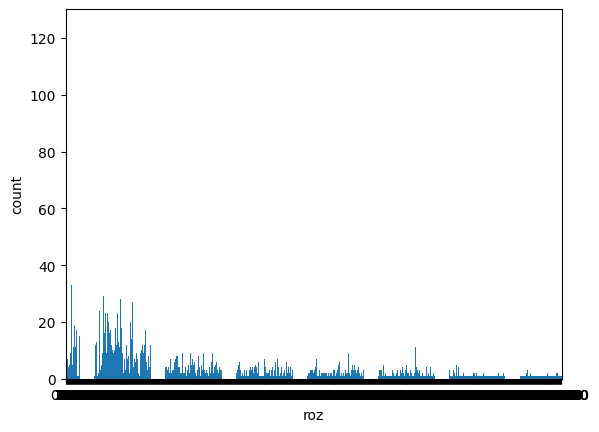

In [ ]:
# Строим график, чтобы проверить распределение розничных цен по всем позициям
sns.countplot(x='roz', data=df)
plt.show()

# Получается не слишком наглядно, попробуем другой способ

<Axes: xlabel='rroz', ylabel='kol'>

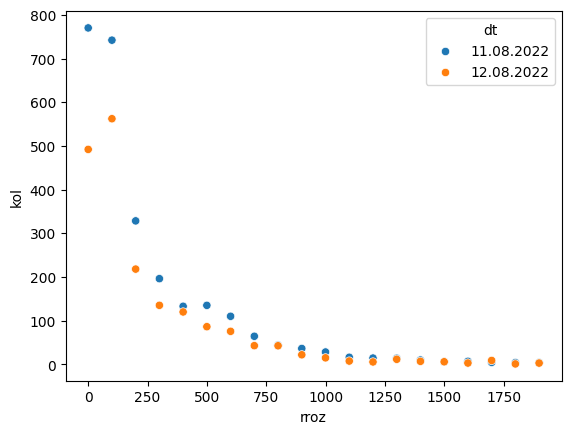

In [31]:
# Округляем розничные цены до целого и строим по ним скаттерплот (точечный график)
df['rroz'] = df.roz.apply(lambda x: round(x, -2))

a = df.groupby(['dt', 'rroz'])['kol'].sum().reset_index()
a = a[a.loc[:, 'rroz'] < 2000]

sns.scatterplot(x=a.rroz, y=a.kol, hue=a.dt)

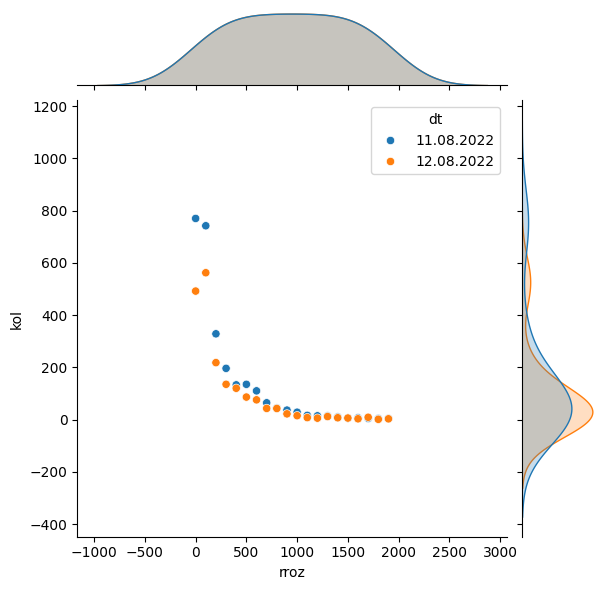

In [ ]:
# Также строим джоинтплот для большей наглядности
sns.jointplot(x=a.rroz, y=a.kol, hue=a.dt)